# Proyek Analisis Data: E-Commerce Public Dataset

Nama: ANGGI NOVITASARI |
Email: angginovitasari.id@gmail.com |
ID Dicoding: angginovitasari

## I. Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan sepanjang 2018 ini?
2. Bagaimana trend customer dan product pada pesanan yang sukses?
3. Bagaimana performa top and least performing sellers tahun 2018?

## II. Menyiapkan semua library yang dibutuhkan

In [1]:
pip install folium pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## III. Data Wrangling

### 3.1 Data Gathering

#### a. orders_df

In [3]:
#orders data
orders_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### b. customers_df

In [4]:
#customers data
customers_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### c. geolocation_df

In [5]:
#geolocation data
geolocation_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### d. ordered_items_df

In [6]:
#order items data
ordered_items_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\order_items_dataset.csv")
ordered_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### e. sellers_df

In [7]:
#seller data
sellers_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### f. review_df

In [8]:
#item review data
review_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### g. payment_df

In [9]:
#payment data
payment_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### h. products_df

In [10]:
#products data
products_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### i. english_category_df

In [11]:
#english category
english_category_df=pd.read_csv("F:\DICODING\Data Project\E-Commerce Public Dataset\product_category_name_translation.csv")
english_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 3.2 Data Assessing

#### a. orders_df

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
#check missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
#check the missing value rows
missing_orders_df = orders_df.isna()

rows_with_missing = orders_df[missing_orders_df.any(axis=1)]
print(rows_with_missing)

                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6      

In [15]:
#memeriksa nilai di order_status 
kategori_order_status = orders_df['order_status'].unique()
print("kategori order status:", kategori_order_status)

kategori order status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [16]:
#check the duplicates
print("jumlah duplikasi orders_df", orders_df.duplicated().sum())

jumlah duplikasi orders_df 0


In [17]:
#Check the statistical parameters
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### b. customers_df

In [18]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
# cek daftar nilai city
print("customer_city:",customers_df['customer_city'].unique())

# cek daftar nilai state
print("customer_state:",customers_df['customer_state'].unique())


customer_city: ['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
customer_state: ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


In [20]:
#check the duplicates
print("jumlah duplikasi customers_df", customers_df.duplicated().sum())

jumlah duplikasi customers_df 0


In [21]:
print("jumlah duplikasi nilai customer_id", customers_df.duplicated('customer_id').sum())

jumlah duplikasi nilai customer_id 0


In [22]:
print("jumlah duplikasi nilai customer_unique_id", customers_df.duplicated('customer_unique_id').sum())

jumlah duplikasi nilai customer_unique_id 3345


Hasil di atas mengindikasikan customer_id selalu berbeda meski pada customer yang sama. Untuk menghitung jumlah customer dengan menggunakan customer_unique_id

In [23]:
#Check the statistical parameters
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### c. geolocation_df

In [24]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [25]:
#check the duplicates
print("jumlah duplikasi geolocation_df", geolocation_df.duplicated().sum())

jumlah duplikasi geolocation_df 261831


In [26]:
#Check the statistical parameters
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


#### d. ordered_items_df

In [27]:
ordered_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
#check the duplicates
print("jumlah duplikasi ordered_items_df", ordered_items_df.duplicated().sum())

jumlah duplikasi ordered_items_df 0


In [29]:
#cek apakah 1 order_id bisa beberapa items
print("Duplikasi pada order_id:", ordered_items_df['order_id'].duplicated().sum())

Duplikasi pada order_id: 13984


In [30]:
# Find duplicate rows based on the 'order_id' column in the df
duplicate_rows = ordered_items_df[ordered_items_df.duplicated(subset='order_id', keep=False)]

# Display the example rows with duplicate 'order_id' values
print(duplicate_rows)


                                order_id  order_item_id  \
13      0008288aa423d2a3f00fcb17cd7d8719              1   
14      0008288aa423d2a3f00fcb17cd7d8719              2   
32      00143d0f86d6fbd9f9b38ab440ac16f5              1   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
...                                  ...            ...   
112635  fff8287bbae429a99bb7e8c21d151c41              2   
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
13      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0f

1 order_id bisa >1 row karena produk yang dibeli berbeda

In [31]:
# Check the unique values and their counts in the 'order_item_id' column
order_item_id_counts = ordered_items_df['order_item_id'].value_counts()

# Display the unique values and their counts
print(order_item_id_counts)


1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64


In [32]:
#Check the statistical parameters
ordered_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### e. sellers_df

In [33]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [34]:
#check the duplicates
print("jumlah duplikasi sellers_df", sellers_df.duplicated().sum())

jumlah duplikasi sellers_df 0


In [35]:
sellers_df.duplicated('seller_id').sum()

0

In [36]:
#Check the statisticaddl parameters
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


#### f. review_df

In [37]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [38]:
#check missing values
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [39]:
#check the duplicates
print("jumlah duplikasi review_df", review_df.duplicated().sum())

jumlah duplikasi review_df 0


In [40]:
#Check the statistical parameters
review_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### g. payment_df

In [41]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [42]:
# Memeriksa nilai di kolom payment_sequential
kategori_payment_sequential = payment_df['payment_sequential'].unique()
print("Kategori di payment_sequential:", kategori_payment_sequential)

# Memeriksa nilai di kolom payment_type
kategori_payment_type = payment_df['payment_type'].unique()
print("\nKategori di payment_type:", kategori_payment_type)

# Memeriksa nilai di kolom  payment_installments
kategori_payment_installments = payment_df['payment_installments'].unique()
print("\nKategori payment_intallments:",kategori_payment_installments)


Kategori di payment_sequential: [ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]

Kategori di payment_type: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']

Kategori payment_intallments: [ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23]


In [43]:
#check the duplicates
print("jumlah duplikasi payment_df", payment_df.duplicated().sum())

jumlah duplikasi payment_df 0


In [44]:
#Check the statistical parameters
payment_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### h. products_df

In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
#check missing values
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [47]:
#menampilkan baris dengan missing values
print(products_df[products_df.isnull().any(axis=1)])

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [48]:
#check the duplicates
print("jumlah duplikasi products_df", products_df.duplicated().sum())

jumlah duplikasi products_df 0


In [49]:
#Check the statistical parameters
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


#### i. english_category_df

In [50]:
english_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
#check the duplicates
print("jumlah duplikasi english_category_df", english_category_df.duplicated().sum())

jumlah duplikasi english_category_df 0


In [52]:
#Check the statistical parameters
english_category_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 3.3 Data Cleaning

#### a. orders_df

Transform data type

In [53]:
#convert data date ke datetime type
orders_date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in orders_date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

Extract month and year

In [54]:
# Extract the year and month into separate columns
orders_df['year_order_purchase'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['month_order_purchase'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Display the updated DataFrame with 'year' and 'month' columns
print(orders_df[['order_id', 'order_purchase_timestamp', 'year_order_purchase', 'month_order_purchase']])


                               order_id order_purchase_timestamp  \
0      e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1      53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2      47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3      949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4      ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   
...                                 ...                      ...   
99436  9c5dedf39a927c1b2549525ed64a053c      2017-03-09 09:54:05   
99437  63943bddc261676b46f01ca7ac2f7bd8      2018-02-06 12:58:58   
99438  83c1379a015df1e13d02aae0204711ab      2017-08-27 14:46:43   
99439  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   
99440  66dea50a8b16d9b4dee7af250b4be1a5      2018-03-08 20:57:30   

       year_order_purchase month_order_purchase  
0                     2017              2017-10  
1                     2018              2018-07  
2                     2018       

#### Excluding 2017 data

Karena hanya akan menggunakan record tahun 2018, maka kita exclude record tahun 2017. 
Tabel ini yang akan kita pakai selanjutnya sebagai key table.

In [55]:
#membuat tabel 2018
orders_df_2018 = orders_df[orders_df['year_order_purchase'] == 2018]

# Create a copy of the DataFrame 
orders_df_2018 = orders_df_2018.copy()

# Display the DataFrame with records only for the year 2018
orders_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54011 entries, 1 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       54011 non-null  object        
 1   customer_id                    54011 non-null  object        
 2   order_status                   54011 non-null  object        
 3   order_purchase_timestamp       54011 non-null  datetime64[ns]
 4   order_approved_at              53929 non-null  datetime64[ns]
 5   order_delivered_carrier_date   53420 non-null  datetime64[ns]
 6   order_delivered_customer_date  52778 non-null  datetime64[ns]
 7   order_estimated_delivery_date  54011 non-null  datetime64[ns]
 8   year_order_purchase            54011 non-null  int64         
 9   month_order_purchase           54011 non-null  object        
dtypes: datetime64[ns](5), int64(1), object(4)
memory usage: 4.5+ MB


missing value pada orders_df_2018 dikarenakan belum atau tidak adanya pengiriman barang. 
Jika dihapus, maka akan menyisakan df dengan order status 'delivered' saja.
Untuk sementara tidak dilakukan penanganan missing values di sini karena kita masih membutuhkan status order yang lain untuk analisa penjualan secara umum.

#### b. customers_df

In [56]:
#mengubah nama kolom 
customers_df.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

#### c. geolocation_df

In [57]:
#Drop column city dan state karena tabel lain sudah memiliki keterangan city dan state
geolocation_df.drop(columns=['geolocation_city', 'geolocation_state'], inplace=True)

In [58]:
#ubah nama kolom
geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [59]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat  1000163 non-null  float64
 2   geolocation_lng  1000163 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 22.9 MB


In [60]:
#drop duplicate data
geolocation_df.drop_duplicates(inplace=True)

In [61]:
#cek duplikasi pada kolom zip cide 
duplicate_zipcode = geolocation_df[geolocation_df['zip_code_prefix'].duplicated(keep=False)]
print(duplicate_zipcode)

         zip_code_prefix  geolocation_lat  geolocation_lng
0                   1037       -23.545621       -46.639292
1                   1046       -23.546081       -46.644820
2                   1046       -23.546129       -46.642951
3                   1041       -23.544392       -46.639499
4                   1035       -23.541578       -46.641607
...                  ...              ...              ...
1000155            99965       -28.180655       -52.034367
1000156            99950       -28.072188       -52.011272
1000157            99950       -28.068864       -52.012964
1000158            99950       -28.068639       -52.010705
1000161            99980       -28.388932       -51.846871

[718920 rows x 3 columns]


Dari data di atas diketahui bahwa 1 zip code prefix dapat terdiri dari beberapa geo lat dan lang

In [62]:
#kita ambil mean dari lat dan lng untuk mewakili 1 zip code prefix
# Group by 'zip_code_prefix'
zip_grouped = geolocation_df.groupby('zip_code_prefix')

# Calculate the mean latitude and longitude for each ZIP code
geolocation_df = zip_grouped.agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

# Rename the columns
geolocation_df.columns = ['zip_code_prefix', 'mean_latitude', 'mean_longitude']

In [63]:
#cek duplikasi pada kolom zip code 
duplicate_zipcode = geolocation_df[geolocation_df['zip_code_prefix'].duplicated(keep=False)]
print(duplicate_zipcode)

Empty DataFrame
Columns: [zip_code_prefix, mean_latitude, mean_longitude]
Index: []


#### d. ordered_items_df

In [64]:
#Convert order_item_id dari int ke object 
ordered_items_df['order_item_id'] = ordered_items_df['order_item_id'].astype(str)

#Convert shipping_limit_date object ke datetime
ordered_items_df['shipping_limit_date'] = pd.to_datetime(ordered_items_df['shipping_limit_date'])

ordered_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


#### e. sellers_df

Tidak ada yang perlu dibersihkan

#### f. review_df

In [65]:
#drop unnecessary free-text columns 
# List of column names to drop
columns_to_drop = ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

# Drop the columns
review_df.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame after dropping the columns
review_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


#### g. payment_df

#### h. products_df


Terdapat 610 produk yang tidak memiliki nama dan deskripsi,
2 produk tidak memiliki ukuran 

In [66]:
#cek produk yang tidak memiliki ukuran
# Create a boolean mask for rows with missing values in 'product_weight_g'
missing_weight_mask = products_df['product_weight_g'].isnull()

# Use the mask to filter the DataFrame
missing_weight_rows = products_df[missing_weight_mask]

# Display the rows with missing values in 'product_weight_g'
print(missing_weight_rows)


                             product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN  


In [67]:
# cek apakah ada pembelian untuk kedua barang tsb

# Create a boolean mask for the specified product_id values
mask_8578 = ordered_items_df['product_id'] == '09ff539a621711667c43eba6a3bd8466'
mask_18851 = ordered_items_df['product_id'] == '5eb564652db742ff8f28759cd8d2652a'

# Check if product_id 8578 exists
if mask_8578.any():
    print("Product_id 8578 exists in the DataFrame.")
else:
    print("Product_id 8578 does not exist in the DataFrame.")

# Check if product_id 18851 exists
if mask_18851.any():
    print("Product_id 18851 exists in the DataFrame.")
else:
    print("Product_id 18851 does not exist in the DataFrame.")


Product_id 8578 exists in the DataFrame.
Product_id 18851 exists in the DataFrame.


untuk sementara tidak dilakukan penanganan missing value kedua product_id tsb

In [68]:
#fill nama dan deskripsi products dengan 'noname' dan 0
# Fill missing values in the 'product_category_name' column with "noname"
products_df['product_category_name'].fillna('noname', inplace=True)

# Fill missing values in float columns with 0
columns_float = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
products_df[columns_float] = products_df[columns_float].fillna(0)

# Display the DataFrame after filling missing values
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### i. english_category_df

In [69]:
# Create a new DataFrame with the 'noname' values
new_row = pd.DataFrame({'product_category_name': ['noname'],
                        'product_category_name_english': ['noname']})

# Concatenate the new row DataFrame with the existing DataFrame
english_category_df = pd.concat([english_category_df, new_row], ignore_index=True)


## IV. Exploratory Data Analysis

### a. Eksplore orders_df

In [70]:
#PIVOT Table orders_df_2018
orders_df_2018.groupby(by='order_status').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_order_purchase,month_order_purchase
order_status,,,,,,,,,
canceled,334,334,334,253,69,1,334,334,334
created,1,1,1,0,0,0,1,1,1
delivered,52783,52783,52783,52783,52783,52777,52783,52783,52783
invoiced,121,121,121,121,0,0,121,121,121
processing,59,59,59,59,0,0,59,59,59
shipped,568,568,568,568,568,0,568,568,568
unavailable,145,145,145,145,0,0,145,145,145


Membuat kolom 'category' berdasarkan status order. 

In [71]:
#Create a new column with 4 categories: 'on process', 'delivered', 'cancelled', 'unavailable'

# Define category
def categorize_order(status):
    if status in ['approved', 'created', 'invoiced', 'processing', 'shipped']:
        return 'on process'
    elif status == 'delivered':
        return 'delivered'
    elif status == 'canceled':
        return 'cancelled'
    else:
        return 'unavailable'

# Apply the categorize_order function to create a new 'category' column
orders_df_2018['category'] = orders_df_2018['order_status'].apply(categorize_order)

# Display the updated DataFrame with the 'category' column
print(orders_df_2018[['order_id', 'order_status', 'category']])


                               order_id order_status   category
1      53cdb2fc8bc7dce0b6741e2150273451    delivered  delivered
2      47770eb9100c2d0c44946d9cf07ec65d    delivered  delivered
4      ad21c59c0840e6cb83a9ceb5573f8159    delivered  delivered
12     82566a660a982b15fb86e904c8d32918    delivered  delivered
13     5ff96c15d0b717ac6ad1f3d77225a350    delivered  delivered
...                                 ...          ...        ...
99428  c22a47117b6a87c967b0c278488110c1    delivered  delivered
99430  c81f74e50f0496fa39716cc77cacd460    delivered  delivered
99437  63943bddc261676b46f01ca7ac2f7bd8    delivered  delivered
99439  11c177c8e97725db2631073c19f07b62    delivered  delivered
99440  66dea50a8b16d9b4dee7af250b4be1a5    delivered  delivered

[54011 rows x 3 columns]


In [72]:
# Group by 'category' and 'month_order_purchase' and count the number of rows in each group
monthly_grouped_df = orders_df_2018.groupby(['category', 'month_order_purchase']).size().reset_index(name='count')

# Display the grouped DataFrame
print(monthly_grouped_df)


       category month_order_purchase  count
0     cancelled              2018-01     34
1     cancelled              2018-02     73
2     cancelled              2018-03     26
3     cancelled              2018-04     15
4     cancelled              2018-05     24
5     cancelled              2018-06     18
6     cancelled              2018-07     41
7     cancelled              2018-08     84
8     cancelled              2018-09     15
9     cancelled              2018-10      4
10    delivered              2018-01   7069
11    delivered              2018-02   6555
12    delivered              2018-03   7003
13    delivered              2018-04   6798
14    delivered              2018-05   6749
15    delivered              2018-06   6099
16    delivered              2018-07   6159
17    delivered              2018-08   6351
18   on process              2018-01    118
19   on process              2018-02     70
20   on process              2018-03    165
21   on process              201

Mencari lama waktu proses order

In [73]:
# Calculate delta between 'order_approved_at' and 'order_purchase_timestamp' in seconds
orders_df_2018['seconds_purchase_to_approved'] = (orders_df_2018['order_approved_at'] - orders_df_2018['order_purchase_timestamp']).dt.total_seconds()

# Calculate delta between 'order_delivered_carrier_date' and 'order_approved_at' in seconds
orders_df_2018['seconds_approved_to_delivered'] = (orders_df_2018['order_delivered_carrier_date'] - orders_df_2018['order_approved_at']).dt.total_seconds()

# Function to convert seconds to appropriate units
def convert_time_delta(delta_seconds):
    if delta_seconds < 60:  # Less than 1 minute
        return f'{delta_seconds:.0f} seconds'
    elif delta_seconds < 3600:  # Less than 1 hour
        return f'{delta_seconds // 60:.0f} minutes'
    elif delta_seconds < 86400:  # Less than 24 hours
        return f'{delta_seconds // 3600:.0f} hours'
    elif delta_seconds < 2592000:  # Less than 30 days
        return f'{delta_seconds // 86400:.0f} days'
    else:
        return f'{delta_seconds // 2592000:.0f} months'

# Apply the conversion function to create new columns
orders_df_2018['purchase_to_approved_conversion'] = orders_df_2018['seconds_purchase_to_approved'].apply(convert_time_delta)
orders_df_2018['approved_to_delivered_conversion'] = orders_df_2018['seconds_approved_to_delivered'].apply(convert_time_delta)


In [74]:
#Pivoting by category
orders_df_2018.groupby(by='category').agg({
    "order_status": "count",
    "seconds_purchase_to_approved": ["mean", "min", "max"],
    "seconds_approved_to_delivered": ["mean", "min", "max"]
})


order_status seconds_purchase_to_approved                    \
                   count                         mean    min        max   
category                                                                  
cancelled            334                 26552.462451  360.0   410649.0   
delivered          52783                 37456.850596  330.0  2669197.0   
on process           749                 41072.875668  368.0   512432.0   
unavailable          145                 87553.841379  369.0  2811078.0   

            seconds_approved_to_delivered                         
                                     mean         min        max  
category                                                          
cancelled                   206349.420290     28801.0   880784.0  
delivered                   221864.187049 -14793322.0  4832848.0  
on process                  242313.977113   -353967.0  2183603.0  
unavailable                           NaN         NaN        NaN

Dari data di atas, kita dapat mengetahui bahwa: Pada Kategori 'delivered' dan 'unavailable':
    Max Waktu dari purchase ke approved >2,600,000 detik atau lebih dari 30 hari. 
    -Hal ini dapat menjadi warning adanya outliers untuk analisa data lanjutan jika digunakan bersama. 

Pada kategori 'delivered' dan 'on process':
    Minimum waktu dari 'approved ke delivered' bernilai negatif,
    -Akan kita cek terlebih dahulu. 

In [75]:
# Create a boolean mask for rows where both columns are less than 0
minus_seconds = (orders_df_2018['seconds_purchase_to_approved'] < 0) | (orders_df_2018['seconds_approved_to_delivered'] < 0)

# Use the mask to filter the DataFrame
minus_seconds_df = orders_df_2018[minus_seconds]

# Display the rows where both columns are less than 0
print(minus_seconds_df)


                               order_id                       customer_id  \
15     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
64     688052146432ef8253587b930b01a06d  81e08b08e5ed4472008030d70327c71f   
199    58d4c4747ee059eeeb865b349b41f53a  1755fad7863475346bc6c3773fe055d3   
210    412fccb2b44a99b36714bca3fef8ad7b  c6865c523687cb3f235aa599afef1710   
415    56a4ac10a4a8f2ba7693523bb439eede  78438ba6ace7d2cb023dbbc81b083562   
...                                 ...                               ...   
99086  bb8871a92af73ddadeac0531a0787131  ce757220d9f01ba4887f6bf76ced6a1c   
99091  240ead1a7284667e0ec71d01f80e4d5e  fcdd7556401aaa1c980f8b67a69f95dc   
99230  78008d03bd8ef7fcf1568728b316553c  043e3254e68daf7256bda1c9c03c2286   
99266  76a948cd55bf22799753720d4545dd2d  3f20a07b28aa252d0502fe7f7eb030a9   
99377  a6bd1f93b7ff72cc348ca07f38ec4bee  6d63fa86bd2f62908ad328325799152f   

      order_status order_purchase_timestamp   order_approved_at  \
15      

Ternyata nilai minus ada di 1275 dari 54011 baris data (2,36%). Jika tetap digunakan bersama, maka akan mempengaruhi nilai pengukuran distribusi. Oleh karena itu, penanganan membutuhkan analisa dengan tabel lainnya.
Kita lakukan merge dataframes menjadi 1.

### b. Merge and Select data

#### orders_df_2018 dan ordered_items as orders_2018

In [76]:
# 1. Merge orders_df with ordered_items_df on order_id
orders_df_2018 = orders_df_2018.merge(ordered_items_df, on='order_id', how='left')

In [77]:
orders_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61652 entries, 0 to 61651
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          61652 non-null  object        
 1   customer_id                       61652 non-null  object        
 2   order_status                      61652 non-null  object        
 3   order_purchase_timestamp          61652 non-null  datetime64[ns]
 4   order_approved_at                 61570 non-null  datetime64[ns]
 5   order_delivered_carrier_date      61002 non-null  datetime64[ns]
 6   order_delivered_customer_date     60319 non-null  datetime64[ns]
 7   order_estimated_delivery_date     61652 non-null  datetime64[ns]
 8   year_order_purchase               61652 non-null  int64         
 9   month_order_purchase              61652 non-null  object        
 10  category                          61652 non-nu

Data order menjadi lebih banyak karena digabung dengan data order item, dimana 1 order_id dapat berada di > 1 rows karena ada >1 item yang diwakilinya.

Analisa waktu pengiriman barang dari seller

In [78]:
#cek waktu pengiriman seller
# Calculate the difference in days between 'order_delivered_carrier_date' and 'shipping_limit_date'
orders_df_2018['delivery_delay_days'] = (orders_df_2018['order_delivered_carrier_date'] - orders_df_2018['shipping_limit_date']).dt.days

# Create a new column 'delivery_status' where 1 indicates late delivery and 0 indicates on-time or early delivery
orders_df_2018['late_delivery'] = orders_df_2018['delivery_delay_days'].apply(lambda x: 1 if x > 0 else 0)

In [79]:
# Display the DataFrame with the new 'delivery_status' column
delay = orders_df_2018.groupby('late_delivery').agg(Order_Count=('order_id', 'count'), Average_Delay=('delivery_delay_days', 'mean'))

# Display the result
print(delay)

               Order_Count  Average_Delay
late_delivery                            
0                    59177      -4.029849
1                     2475       4.515960


In [80]:
#reduce table dengan mengambil columns yang dibutuhkan saja

columns_to_keep = [
    'order_id', 'customer_id', 'month_order_purchase', 'category', 'order_purchase_timestamp',
    'seconds_purchase_to_approved', 'seconds_approved_to_delivered',
    'purchase_to_approved_conversion','approved_to_delivered_conversion',
    'order_item_id', 'product_id', 'seller_id', 'delivery_delay_days', 'late_delivery',
    'price', 'freight_value',
]

orders_2018 = orders_df_2018[columns_to_keep].copy()


In [81]:
orders_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61652 entries, 0 to 61651
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          61652 non-null  object        
 1   customer_id                       61652 non-null  object        
 2   month_order_purchase              61652 non-null  object        
 3   category                          61652 non-null  object        
 4   order_purchase_timestamp          61652 non-null  datetime64[ns]
 5   seconds_purchase_to_approved      61570 non-null  float64       
 6   seconds_approved_to_delivered     61002 non-null  float64       
 7   purchase_to_approved_conversion   61652 non-null  object        
 8   approved_to_delivered_conversion  61652 non-null  object        
 9   order_item_id                     61416 non-null  object        
 10  product_id                        61416 non-nu

#### customers_df and geolocation_df as customers_df

In [82]:
#2. Merge customers_df with geolocation_df on zip code prefix 
customers_df = customers_df.merge(geolocation_df, on='zip_code_prefix', how='left')

In [83]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         99441 non-null  object 
 1   customer_unique_id  99441 non-null  object 
 2   zip_code_prefix     99441 non-null  int64  
 3   customer_city       99441 non-null  object 
 4   customer_state      99441 non-null  object 
 5   mean_latitude       99163 non-null  float64
 6   mean_longitude      99163 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


#### payment_df and order_review as payment_review

In [84]:
#3. Merge payment_df dan order_review on order_id as payment_review
payment_review = payment_df.merge(review_df, on='order_id', how='left')

In [85]:
payment_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              104477 non-null  object 
 1   payment_sequential    104477 non-null  int64  
 2   payment_type          104477 non-null  object 
 3   payment_installments  104477 non-null  int64  
 4   payment_value         104477 non-null  float64
 5   review_id             103677 non-null  object 
 6   review_score          103677 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 6.4+ MB


#### products_df dan english_category_df as products_df

In [86]:
#4. Merge products_df dan english_category_df on product_category_name as products_df
products_df = products_df.merge(english_category_df, on='product_category_name', how='left')

In [87]:
products_df.drop(columns='product_category_name', inplace=True)

In [88]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32951 non-null  float64
 2   product_description_lenght     32951 non-null  float64
 3   product_photos_qty             32951 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32938 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


#### orders_2018 dan sellers_df as df_2018

In [89]:
#5. Merge orders_2018 and sellers_df on seller_id as df_2018
df_2018=orders_2018.merge(sellers_df, on='seller_id', how='left')

In [90]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61652 entries, 0 to 61651
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          61652 non-null  object        
 1   customer_id                       61652 non-null  object        
 2   month_order_purchase              61652 non-null  object        
 3   category                          61652 non-null  object        
 4   order_purchase_timestamp          61652 non-null  datetime64[ns]
 5   seconds_purchase_to_approved      61570 non-null  float64       
 6   seconds_approved_to_delivered     61002 non-null  float64       
 7   purchase_to_approved_conversion   61652 non-null  object        
 8   approved_to_delivered_conversion  61652 non-null  object        
 9   order_item_id                     61416 non-null  object        
 10  product_id                        61416 non-nu

#### df_2018 dan payment_review as df_2018

In [91]:
#6. Merge df_2018 and payment_review as df_2018
df_2018=df_2018.merge(payment_review, on='order_id', how='left')

In [92]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64185 entries, 0 to 64184
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          64185 non-null  object        
 1   customer_id                       64185 non-null  object        
 2   month_order_purchase              64185 non-null  object        
 3   category                          64185 non-null  object        
 4   order_purchase_timestamp          64185 non-null  datetime64[ns]
 5   seconds_purchase_to_approved      64096 non-null  float64       
 6   seconds_approved_to_delivered     63511 non-null  float64       
 7   purchase_to_approved_conversion   64185 non-null  object        
 8   approved_to_delivered_conversion  64185 non-null  object        
 9   order_item_id                     63937 non-null  object        
 10  product_id                        63937 non-nu

In [93]:
df_2018.duplicated('order_id')

0        False
1        False
2        False
3        False
4        False
         ...  
64180    False
64181    False
64182    False
64183     True
64184    False
Length: 64185, dtype: bool

#### df_2018 dan products_df as df_2018

In [94]:
#7. Merge df_2018 and products_df on product_id as df_2018
df_2018=df_2018.merge(products_df, on='product_id', how='left')

In [95]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64185 entries, 0 to 64184
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          64185 non-null  object        
 1   customer_id                       64185 non-null  object        
 2   month_order_purchase              64185 non-null  object        
 3   category                          64185 non-null  object        
 4   order_purchase_timestamp          64185 non-null  datetime64[ns]
 5   seconds_purchase_to_approved      64096 non-null  float64       
 6   seconds_approved_to_delivered     63511 non-null  float64       
 7   purchase_to_approved_conversion   64185 non-null  object        
 8   approved_to_delivered_conversion  64185 non-null  object        
 9   order_item_id                     63937 non-null  object        
 10  product_id                        63937 non-nu

#### df_2018 dan customers_df as df_2018

In [96]:
#8. Merge df_2018 and customers_df as df_2018
df_2018=df_2018.merge(customers_df, on='customer_id', how='left')

In [97]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64185 entries, 0 to 64184
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          64185 non-null  object        
 1   customer_id                       64185 non-null  object        
 2   month_order_purchase              64185 non-null  object        
 3   category                          64185 non-null  object        
 4   order_purchase_timestamp          64185 non-null  datetime64[ns]
 5   seconds_purchase_to_approved      64096 non-null  float64       
 6   seconds_approved_to_delivered     63511 non-null  float64       
 7   purchase_to_approved_conversion   64185 non-null  object        
 8   approved_to_delivered_conversion  64185 non-null  object        
 9   order_item_id                     63937 non-null  object        
 10  product_id                        63937 non-nu

### C. Make tables based on category

In [98]:
# Separate df_2018 into four DataFrames based on category
cancelled_df = df_2018[df_2018['category'] == 'cancelled']
delivered_df = df_2018[df_2018['category'] == 'delivered']
on_process_df =df_2018[df_2018['category'] == 'on process']
unavailable_df = df_2018[df_2018['category'] == 'unavailable']

In [99]:
cancelled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 266 to 64125
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          386 non-null    object        
 1   customer_id                       386 non-null    object        
 2   month_order_purchase              386 non-null    object        
 3   category                          386 non-null    object        
 4   order_purchase_timestamp          386 non-null    datetime64[ns]
 5   seconds_purchase_to_approved      298 non-null    float64       
 6   seconds_approved_to_delivered     73 non-null     float64       
 7   purchase_to_approved_conversion   386 non-null    object        
 8   approved_to_delivered_conversion  386 non-null    object        
 9   order_item_id                     289 non-null    object        
 10  product_id                        289 non-null

In [100]:
delivered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62808 entries, 0 to 64184
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          62808 non-null  object        
 1   customer_id                       62808 non-null  object        
 2   month_order_purchase              62808 non-null  object        
 3   category                          62808 non-null  object        
 4   order_purchase_timestamp          62808 non-null  datetime64[ns]
 5   seconds_purchase_to_approved      62808 non-null  float64       
 6   seconds_approved_to_delivered     62808 non-null  float64       
 7   purchase_to_approved_conversion   62808 non-null  object        
 8   approved_to_delivered_conversion  62808 non-null  object        
 9   order_item_id                     62808 non-null  object        
 10  product_id                        62808 non-nu

In [101]:
#handle missing values of delivered_df to adjust geolocation data
geo_columns = ['order_id', 'customer_id', 'month_order_purchase','order_purchase_timestamp', 'order_item_id','product_id','seller_id',
               'seller_zip_code_prefix', 'seller_city', 'seller_state', 
               'zip_code_prefix', 'customer_city', 'customer_state', 'mean_latitude', 'mean_longitude']

# Create the geo_df DataFrame with only geolocation-related columns
geo_delivered_df= delivered_df[geo_columns]


In [102]:
geo_delivered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62808 entries, 0 to 64184
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  62808 non-null  object        
 1   customer_id               62808 non-null  object        
 2   month_order_purchase      62808 non-null  object        
 3   order_purchase_timestamp  62808 non-null  datetime64[ns]
 4   order_item_id             62808 non-null  object        
 5   product_id                62808 non-null  object        
 6   seller_id                 62808 non-null  object        
 7   seller_zip_code_prefix    62808 non-null  float64       
 8   seller_city               62808 non-null  object        
 9   seller_state              62808 non-null  object        
 10  zip_code_prefix           62808 non-null  int64         
 11  customer_city             62808 non-null  object        
 12  customer_state    

In [103]:
#drop missing value of geo_delivered_df
geo_delivered_df.dropna(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_496\3568466855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_delivered_df.dropna(inplace=True)


In [104]:
geo_delivered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62639 entries, 0 to 64184
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  62639 non-null  object        
 1   customer_id               62639 non-null  object        
 2   month_order_purchase      62639 non-null  object        
 3   order_purchase_timestamp  62639 non-null  datetime64[ns]
 4   order_item_id             62639 non-null  object        
 5   product_id                62639 non-null  object        
 6   seller_id                 62639 non-null  object        
 7   seller_zip_code_prefix    62639 non-null  float64       
 8   seller_city               62639 non-null  object        
 9   seller_state              62639 non-null  object        
 10  zip_code_prefix           62639 non-null  int64         
 11  customer_city             62639 non-null  object        
 12  customer_state    

In [105]:
# Check for NaN values in mean_longitude and mean_latitude columns
nan_longitude = geo_delivered_df['mean_longitude'].isna().any()
nan_latitude = geo_delivered_df['mean_latitude'].isna().any()

# Print the results
print("NaN in mean_longitude:", nan_longitude)
print("NaN in mean_latitude:", nan_latitude)


NaN in mean_longitude: False
NaN in mean_latitude: False


In [106]:
delivered_df.duplicated('order_id').sum()

10025

In [107]:
on_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 26 to 64100
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          841 non-null    object        
 1   customer_id                       841 non-null    object        
 2   month_order_purchase              841 non-null    object        
 3   category                          841 non-null    object        
 4   order_purchase_timestamp          841 non-null    datetime64[ns]
 5   seconds_purchase_to_approved      840 non-null    float64       
 6   seconds_approved_to_delivered     630 non-null    float64       
 7   purchase_to_approved_conversion   841 non-null    object        
 8   approved_to_delivered_conversion  841 non-null    object        
 9   order_item_id                     840 non-null    object        
 10  product_id                        840 non-null 

Pada tabel on_process_df, terdapat 1 order yang belum diapprove karena masih dalam tahap invoiced, dan 180 orders yang belum dikirim ke kurir.
Dari sini kita dapat mengetahui bahwa pada prosedur approve dilakukans setelah proses pembayaran oleh customer. Oleh karena itu, nilai seconds_purchase_to_approved yang bernilai negatif bermakna bahwa transaksi tersebut menggunakan sistem pembayaran kredit.

Untuk tabel ini, kolom order_delivered_customer_date bisa di-drop 

In [108]:
unavailable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 377 to 64053
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          150 non-null    object        
 1   customer_id                       150 non-null    object        
 2   month_order_purchase              150 non-null    object        
 3   category                          150 non-null    object        
 4   order_purchase_timestamp          150 non-null    datetime64[ns]
 5   seconds_purchase_to_approved      150 non-null    float64       
 6   seconds_approved_to_delivered     0 non-null      float64       
 7   purchase_to_approved_conversion   150 non-null    object        
 8   approved_to_delivered_conversion  150 non-null    object        
 9   order_item_id                     0 non-null      object        
 10  product_id                        0 non-null  

Pada tabel dengan kategori unavailable, semua order (150) telah approved, 147 telah direview,tapi tidak ada pengirimannya.

In [109]:
unavailable_df.dropna(axis=1, how='all', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_496\2442204678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unavailable_df.dropna(axis=1, how='all', inplace=True)


In [110]:
unavailable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 377 to 64053
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          150 non-null    object        
 1   customer_id                       150 non-null    object        
 2   month_order_purchase              150 non-null    object        
 3   category                          150 non-null    object        
 4   order_purchase_timestamp          150 non-null    datetime64[ns]
 5   seconds_purchase_to_approved      150 non-null    float64       
 6   purchase_to_approved_conversion   150 non-null    object        
 7   approved_to_delivered_conversion  150 non-null    object        
 8   late_delivery                     150 non-null    int64         
 9   payment_sequential                150 non-null    int64         
 10  payment_type                      150 non-null

In [111]:
unavailable_df.head()

,order_id,customer_id,month_order_purchase,category,order_purchase_timestamp,seconds_purchase_to_approved,purchase_to_approved_conversion,approved_to_delivered_conversion,late_delivery,payment_sequential,...,payment_installments,payment_value,review_id,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,mean_latitude,mean_longitude
377,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,2018-01,unavailable,2018-01-31 11:31:37,10333.0,2 hours,nan months,0,1,...,1,97.68,b6ea5566d6060db04ebe53a1291e4541,3.0,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,-24.008185,-46.419212
477,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,2018-01,unavailable,2018-01-08 19:39:03,42425.0,11 hours,nan months,0,1,...,1,134.38,519e62c42f33dce5b47ffddf9fde28df,1.0,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,-9.396324,-38.218772
1981,84b8ba39037606b7b30a39d02e9e4154,7c2bf05f6902368e5d21040b68c2bbdb,2018-06,unavailable,2018-06-27 19:51:02,1239.0,20 minutes,nan months,0,1,...,1,414.97,cdf7e0ccf26ce958423a8163447190db,1.0,36e06ca722231b14a75e6a33ffaa5f37,1522,sao paulo,SP,-23.561012,-46.616650
2275,534a0fbe91a806a1dc6bf09b497e3d6f,d17ae8582d302dbd41b87e5028e8c0e2,2018-01,unavailable,2018-01-22 02:45:40,89463.0,1 days,nan months,0,1,...,1,158.30,6280ca6a9e8c3a56b668ec8c5396caaf,1.0,cf41887f4cbf217c6fad258a83ba2d32,5877,sao paulo,SP,-23.691911,-46.790730
2619,1ff6183537eb3a189de77b309ed28ad1,52ac1d5c2063338b5a45f69a14528c9b,2018-01,unavailable,2018-01-02 17:31:02,152779.0,1 days,nan months,0,1,...,1,84.23,a3d0aa1ade63a7d134d25472cb4f659b,1.0,93345700f0e852aa904fae18cec8437c,26087,nova iguacu,RJ,-22.716225,-43.515222


### D. Data Exploration

In [112]:
# Group by 'category' and calculate mean, min, and max for each conversion
categorized_orders= orders_df_2018.groupby('category').agg({
    'seconds_purchase_to_approved': ['mean', 'min', 'max'],
    'seconds_approved_to_delivered': ['mean', 'min', 'max']
}).reset_index()

# Rename the columns for clarity
categorized_orders.columns = ['category', 'mean_purchase_to_approved', 'min_purchase_to_approved', 'max_purchase_to_approved',
                  'mean_approved_to_delivered', 'min_approved_to_delivered', 'max_approved_to_delivered']

# Display the result
print(categorized_orders)

      category  mean_purchase_to_approved  min_purchase_to_approved  \
0    cancelled               27340.487889                     360.0   
1    delivered               38433.386944                     330.0   
2   on process               41887.677340                     368.0   
3  unavailable               87553.841379                     369.0   

   max_purchase_to_approved  mean_approved_to_delivered  \
0                  410649.0               206349.420290   
1                 2669197.0               225655.798256   
2                  512432.0               244524.510673   
3                 2811078.0                         NaN   

   min_approved_to_delivered  max_approved_to_delivered  
0                    28801.0                   880784.0  
1                -14793322.0                  4832848.0  
2                  -353967.0                  2183603.0  
3                        NaN                        NaN  


dari data di atas, diketahui bahwa transaksi tercepat dan paling banyak digunakan adalh dengan menggunakan credit card. Setelah customer melakukan pembelian dengan cc, barang dikirim dalam waktu 70ribuan detik, kemudian 70ribuan detik berikutnya, pembayaran diterima oleh seller.
sedangkan waktu terlama seller approved adalah boleto, dimana menjadi yg banyak digunakan kedua setelah cc. 


Dari info di atas, diketahui bahwa order yang berstatus 'Cancelled' sebagian besar dibatalkan sebelum barang terkirim. Namun ada 69 order yang baru dibatalkan setelah pesanan telah dikirim/dibawa kurir, dan 1 order yang dibatalkan setelah diterima customer. 

Pada order dengan status 'Delivered', terdapat 6 missing values di kolom order_delivered_customer_date. Kita drop saja.

#### Jumlah delivered orders 2018 per bulan

In [113]:
delivered_df.groupby(by='month_order_purchase').order_id.nunique()

month_order_purchase
2018-01    7069
2018-02    6555
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6099
2018-07    6159
2018-08    6351
Name: order_id, dtype: int64

#### Jumlah cancelled orders 2018 per bulan

In [114]:
cancelled_df.groupby(by='month_order_purchase').order_id.nunique()

month_order_purchase
2018-01    34
2018-02    73
2018-03    26
2018-04    15
2018-05    24
2018-06    18
2018-07    41
2018-08    84
2018-09    15
2018-10     4
Name: order_id, dtype: int64

#### Jumlah order di on_process category 2018

In [115]:
on_process_df.groupby(by='month_order_purchase').order_id.nunique()

month_order_purchase
2018-01    118
2018-02     70
2018-03    165
2018-04    121
2018-05     84
2018-06     46
2018-07     74
2018-08     70
2018-09      1
Name: order_id, dtype: int64

on process='approved', 'created', 'invoiced', 'processing', 'shipped'

Ada banyak record di bulan-bulan sebelumnya yang statusnya masih dalam category 'on process'.
Hal ini dapat mengindikasikan bahwa sistem tidak melakukan cancell otomatis jika pesanan tidak dilanjutkan, atau selesai otomatis saat sudah terkirim


#### Jumlah order pada unavailable_df

In [116]:
unavailable_df.groupby('month_order_purchase').order_id.nunique()


month_order_purchase
2018-01    48
2018-02    30
2018-03    17
2018-04     5
2018-05    16
2018-06     4
2018-07    18
2018-08     7
Name: order_id, dtype: int64

# IV. Visualization and Explanatory Data Analysis

### a. Customer Trend

#### Top Customer's City and State

In [117]:
# Group the delivered_df by 'customer_city' and 'customer_state' and count the unique order IDs
customer_city_state_order_counts = delivered_df.groupby(['customer_city', 'customer_state'])['order_id'].nunique().reset_index(name='unique_order_count')

# Sort the DataFrame by unique order count in descending order
customer_city_state_order_counts = customer_city_state_order_counts.sort_values(by='unique_order_count', ascending=False)

# Get the top 10 cities and states
top_10_customer_city_state_order_counts = customer_city_state_order_counts.head(10)

# Display the top 10 cities and states with the most unique orders
print(top_10_customer_city_state_order_counts)

              customer_city customer_state  unique_order_count
2940              sao paulo             SP                8891
2569         rio de janeiro             RJ                3376
373          belo horizonte             MG                1527
463                brasilia             DF                1193
941                curitiba             PR                 851
587                campinas             SP                 801
1250              guarulhos             SP                 673
2402           porto alegre             RS                 665
2643               salvador             BA                 649
2793  sao bernardo do campo             SP                 526


#### Top Customer's State

In [118]:
# Group the delivered_df by 'customer_state' and count the unique order IDs
customer_state_order_counts = delivered_df.groupby('customer_state')['order_id'].nunique().reset_index(name='unique_order_count')

# Sort the DataFrame by unique order count in descending order
customer_state_order_counts = customer_state_order_counts.sort_values(by='unique_order_count', ascending=False)

# Get the top 5 states
top_5_customer_state_order_counts = customer_state_order_counts.head(5)

# Display the top 5 states with the most unique orders
print(top_5_customer_state_order_counts)


   customer_state  unique_order_count
25             SP               23335
18             RJ                6342
10             MG                6079
22             RS                2737
17             PR                2711


In [119]:
# Find the mode (most frequent) payment method for sequential payments
sequential_mode = delivered_df['payment_sequential'].mode().values[0]

# Find the mode (most frequent) payment method for installment payments
installment_mode = delivered_df['payment_installments'].mode().values[0]

print("Mode of payment for sequential payments:", sequential_mode)
print("Mode of payment for installment payments:", installment_mode)


Mode of payment for sequential payments: 1
Mode of payment for installment payments: 1


### b. Product Trend

#### Top Product

In [120]:
#mencari produk terlaris di pesanan yang sukses
# Group by 'product_id' and count the number of times each product appears
product_counts = delivered_df.groupby(['product_id', 'product_category_name_english']).size().reset_index(name='purchase_count')

# Sort the products by purchase count in descending order and take the top 10
top_10_products = product_counts.sort_values(by='purchase_count', ascending=False).head(10)

# Display the top 10 most bought products with their categories
print(top_10_products)


                             product_id product_category_name_english  \
13483  aca2eb7d00ea1a7b8ebd4e68314663af               furniture_decor   
4919   3dd2a17168ec895c781a9191c1e95ad7         computers_accessories   
6645   53b36df67ebb7c41585e8d54d6772e08                 watches_gifts   
16539  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories   
5272   422879e10f46682990de24d770e7f83d                  garden_tools   
12990  a62e25e09e05e6faf31d90c6ec1aa3d1                 watches_gifts   
4311   368c6c730842d78016ad823897a372db                  garden_tools   
4495   389d119b48cf3043d311335e499d9c6b                  garden_tools   
18058  e53e557d5a159f5aa2c5e995dfdf244b         computers_accessories   
14714  bb50f2e236e5eea0100680137654686c                 health_beauty   

       purchase_count  
13483             416  
4919              276  
6645              259  
16539             243  
5272              218  
12990             200  
4311              195  
4495

### c. Sellers Trend

In [121]:
#Sellers location
# Group the delivered_df by 'seller_city' and 'seller_state' and count the unique order IDs
seller_city_state_order_counts = delivered_df.groupby(['seller_city', 'seller_state'])['order_id'].nunique().reset_index(name='unique_order_count')

# Sort the DataFrame by unique order count in descending order
seller_city_state_order_counts = seller_city_state_order_counts.sort_values(by='unique_order_count', ascending=False)

# Get the top 10 cities and states
top_10_seller_city_state_order_counts = seller_city_state_order_counts.head(10)

# Display the top 10 cities and states with the most unique orders
print(top_10_seller_city_state_order_counts)

               seller_city seller_state  unique_order_count
457              sao paulo           SP               13599
197               ibitinga           SP                3086
136               curitiba           PR                1438
193              guarulhos           SP                1389
286                maringa           PR                1330
389         ribeirao preto           SP                1238
395         rio de janeiro           RJ                1203
426            santo andre           SP                1048
50          belo horizonte           MG                1033
446  sao jose do rio preto           SP                 927


In [122]:
# Group the delivered_df by 'customer_state' and count the unique order IDs
seller_state_order_counts = delivered_df.groupby('seller_state')['order_id'].nunique().reset_index(name='unique_order_count')

# Sort the DataFrame by unique order count in descending order
seller_state_order_counts = seller_state_order_counts.sort_values(by='unique_order_count', ascending=False)

# Get the top 5 states
seller_top_5_state_order_counts = seller_state_order_counts.head(5)

# Display the top 5 states with the most unique orders
print(seller_top_5_state_order_counts)


   seller_state  unique_order_count
20           SP               37866
13           PR                4429
6            MG                3603
14           RJ                2517
18           SC                1769


# Pertanyaan 1

1. Bagaimana performa penjualan sepanjang 2018 ini?

#### Overview

In [123]:
# Calculate total sales (sum of payment_value)
total_sales = delivered_df['payment_value'].sum()

# Calculate the number of orders
total_orders = delivered_df['order_id'].nunique()

# Calculate the average order value (AOV)
average_order_value = total_sales / total_orders

# Calculate the number of unique customers
unique_customers = delivered_df['customer_unique_id'].nunique()

# Calculate the number of late deliveries
late_deliveries = delivered_df['late_delivery'].sum()

# Calculate the overall review score (average)
average_review_score = delivered_df['review_score'].mean()

# Display the results
print(f"Total Sales in 2018: ${total_sales:.2f}")
print(f"Total Orders in 2018: {total_orders}")
print(f"Average Order Value in 2018: ${average_order_value:.2f}")
print(f"Number of Unique Customers in 2018: {unique_customers}")
print(f"Number of Late Deliveries in 2018: {late_deliveries}")
print(f"Average Review Score in 2018: {average_review_score:.2f}")


Total Sales in 2018: $10880465.43
Total Orders in 2018: 52783
Average Order Value in 2018: $206.14
Number of Unique Customers in 2018: 51612
Number of Late Deliveries in 2018: 2530
Average Review Score in 2018: 4.06


#### Grafik Revenue bulanan

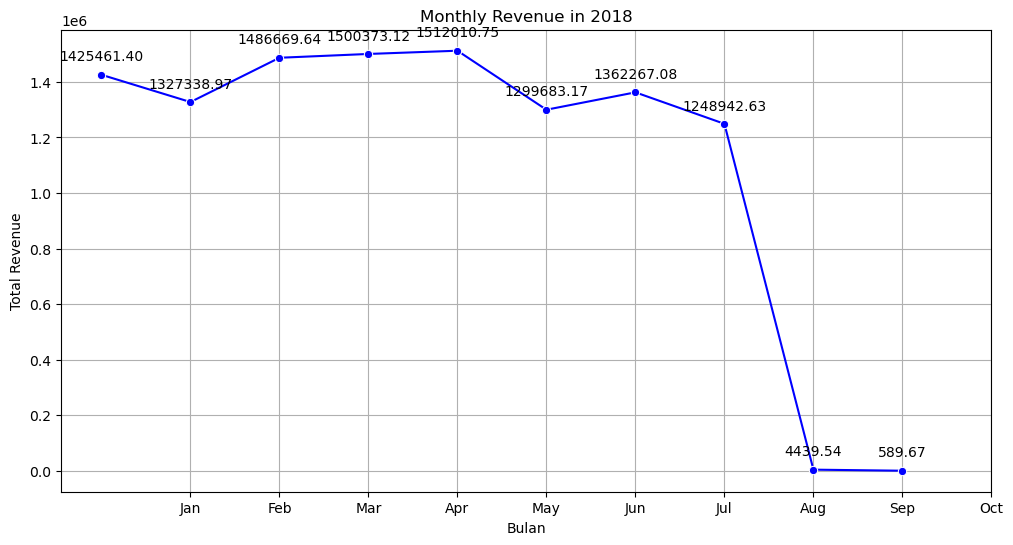

In [124]:
# Group the data by month and calculate total revenue
revenue_by_month = df_2018.groupby('month_order_purchase')['payment_value'].sum().reset_index()

# Create the trend plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_order_purchase', y='payment_value', data=revenue_by_month, marker='o', color='b')
plt.title('Monthly Revenue in 2018')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 11), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
plt.grid(True)

# Add labels to data points
for index, row in revenue_by_month.iterrows():
    plt.annotate(f'{row["payment_value"]:.2f}', (row["month_order_purchase"], row["payment_value"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


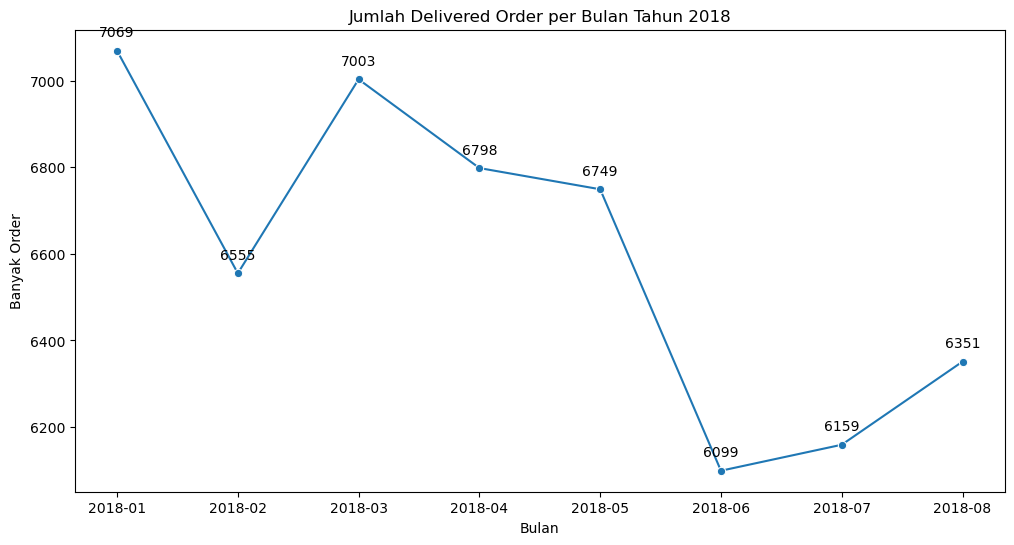

In [125]:
# Calculate the counts of unique order_id per month for the "Delivered" category
delivered_counts_per_month = delivered_df.groupby('month_order_purchase')['order_id'].nunique()

# Plot the line graph for the "Delivered" category
plt.figure(figsize=(12, 6))
sns.lineplot(x=delivered_counts_per_month.index, y=delivered_counts_per_month.values, marker='o')
plt.xlabel('Bulan')
plt.ylabel('Banyak Order')
plt.title('Jumlah Delivered Order per Bulan Tahun 2018')

# Add annotations to data points
for x, y in zip(delivered_counts_per_month.index, delivered_counts_per_month.values):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


#### Grafik Order

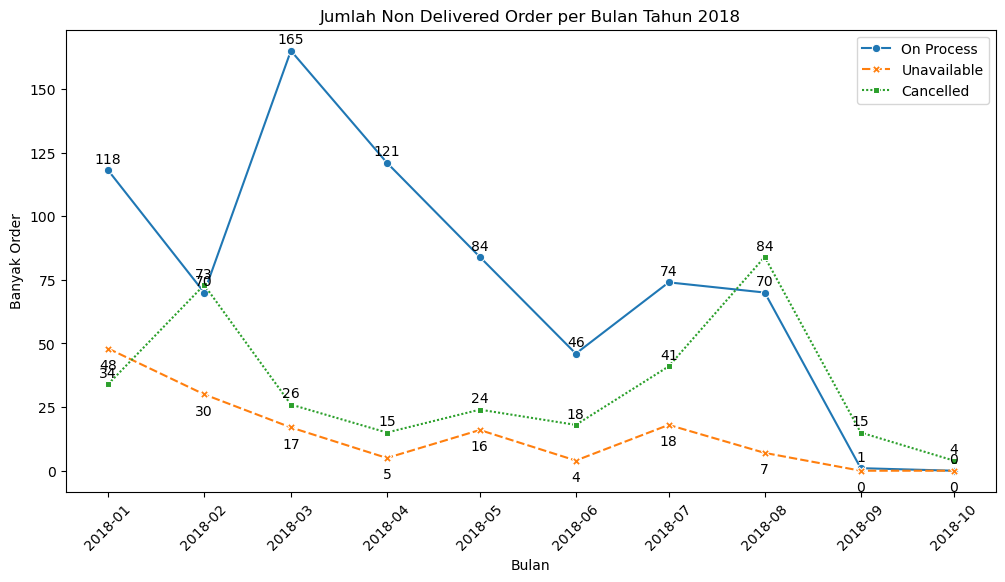

In [126]:
# Create DataFrames for each category
df_on_process = on_process_df.groupby(pd.to_datetime(on_process_df['month_order_purchase'], format='%Y-%m'))['order_id'].nunique().reset_index()
df_unavailable = unavailable_df.groupby(pd.to_datetime(unavailable_df['month_order_purchase'], format='%Y-%m'))['order_id'].nunique().reset_index()
df_cancelled = cancelled_df.groupby(pd.to_datetime(cancelled_df['month_order_purchase'], format='%Y-%m'))['order_id'].nunique().reset_index()

# Create a range of months from January to October
all_months = pd.date_range(start='2018-01-01', end='2018-10-01', freq='M')

# Merge them using 'outer' join on the 'month_order_purchase' column
merged_df = pd.merge(df_on_process, df_unavailable, left_on='month_order_purchase', right_on='month_order_purchase', how='outer')
merged_df = pd.merge(merged_df, df_cancelled, left_on='month_order_purchase', right_on='month_order_purchase', how='outer')

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Rename columns for clarity
merged_df.columns = ['Month', 'On Process', 'Unavailable', 'Cancelled']

# Set the "Month" column as the index
merged_df.set_index('Month', inplace=True)

# Plot the line graph without including the "Month" column
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, markers=True)
plt.xlabel('Bulan')
plt.ylabel('Banyak Order')
plt.title('Jumlah Non Delivered Order per Bulan Tahun 2018')
plt.legend(['On Process', 'Unavailable', 'Cancelled'])

# Add labels to data points
for index, row in merged_df.iterrows():
    plt.annotate(f'{int(row["On Process"])}', (index, row["On Process"]), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.annotate(f'{int(row["Unavailable"])}', (index, row["Unavailable"]), textcoords="offset points", xytext=(0, -15), ha='center')
    plt.annotate(f'{int(row["Cancelled"])}', (index, row["Cancelled"]), textcoords="offset points", xytext=(0, 5), ha='center')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


# Pertanyaan 2

2. Bagaimana trend customer dan product pada pesanan yang sukses?

## a. Customer Trend

### Lokasi

In [127]:
# Create a DataFrame with latitude and longitude
locations = geo_delivered_df[['mean_latitude', 'mean_longitude']]

# Clean any rows with missing or invalid coordinates
locations = locations.dropna()

# Convert the DataFrame to a list of lists
heat_data = [[row['mean_latitude'], row['mean_longitude']] for index, row in locations.iterrows()]

# Create a Folium map centered at an initial location (approximate central point for Brazil)
m = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)  

In [128]:
HeatMap(heat_data).add_to(m)

In [129]:
# display the map
m


#### Payment

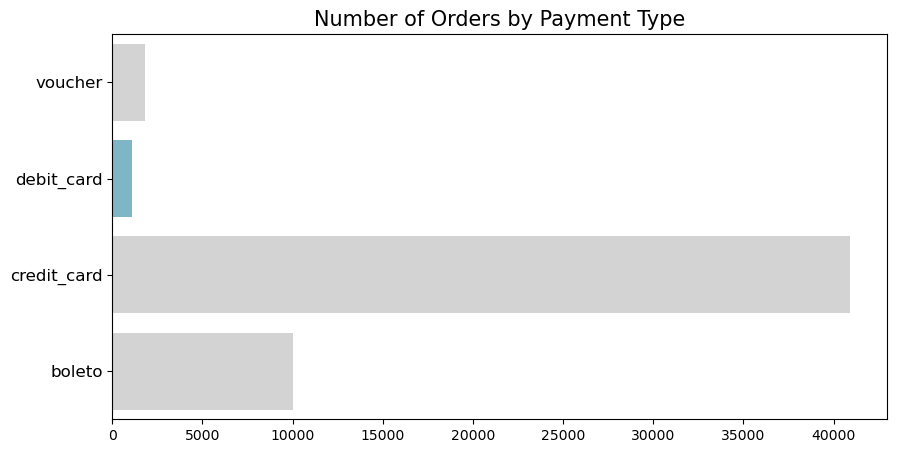

In [130]:
bypayment_df = delivered_df.groupby(by="payment_type")['order_id'].nunique().reset_index()
bypayment_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="order_count",
    y="payment_type",
    data=bypayment_df.sort_values(by="payment_type", ascending=False),
    palette=colors_
)
plt.title("Number of Orders by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


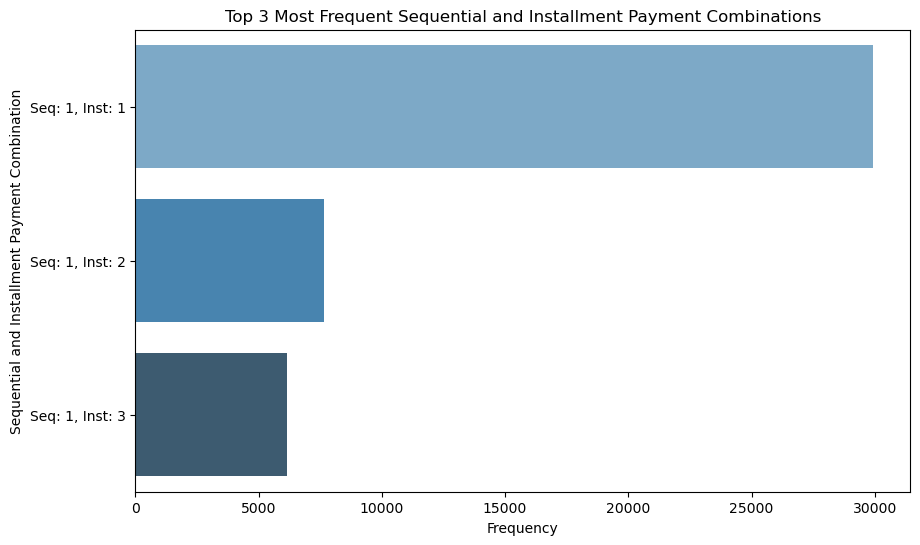

In [131]:
# Find the top 3 most frequent sequential and installment payment combinations
top_payment_combinations = delivered_df.groupby(['payment_sequential', 'payment_installments']).size().reset_index(name='count').nlargest(3, 'count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y=top_payment_combinations.apply(lambda x: f'Seq: {x["payment_sequential"]}, Inst: {x["payment_installments"]}', axis=1), data=top_payment_combinations, palette='Blues_d')
plt.xlabel('Frequency')
plt.ylabel('Sequential and Installment Payment Combination')
plt.title('Top 3 Most Frequent Sequential and Installment Payment Combinations')
plt.xticks(rotation=0)
plt.show()


#### RFM analysis

In [132]:
# Define the reference date as the maximum date in the dataset
reference_date = delivered_df['order_purchase_timestamp'].max()

# Calculate Recency (R) for each customer_unique_id
delivered_df['order_purchase_timestamp'] = pd.to_datetime(delivered_df['order_purchase_timestamp'])
recency_df = delivered_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency_df['recency'] = (reference_date - recency_df['order_purchase_timestamp']).dt.days
recency_df.drop(columns=['order_purchase_timestamp'], inplace=True)

# Calculate Frequency (F) for each customer_unique_id
frequency_df = delivered_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)

# Calculate Monetary (M) for each customer_unique_id
monetary_df = delivered_df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)

# Merge the Recency, Frequency, and Monetary DataFrames
rfm_df = pd.merge(recency_df, frequency_df, on='customer_unique_id', how='inner')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_unique_id', how='inner')

# Display the resulting RFM DataFrame
print(rfm_df.head())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_496\2460375916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_df['order_purchase_timestamp'] = pd.to_datetime(delivered_df['order_purchase_timestamp'])


                 customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0004bd2a26a76fe21f786e4fbd80607f      145          1    166.98
3  00050ab1314c0e55a6ca13cf7181fecf      131          1     35.38
4  00053a61a98854899e70ed204dd4bafe      182          1    838.36


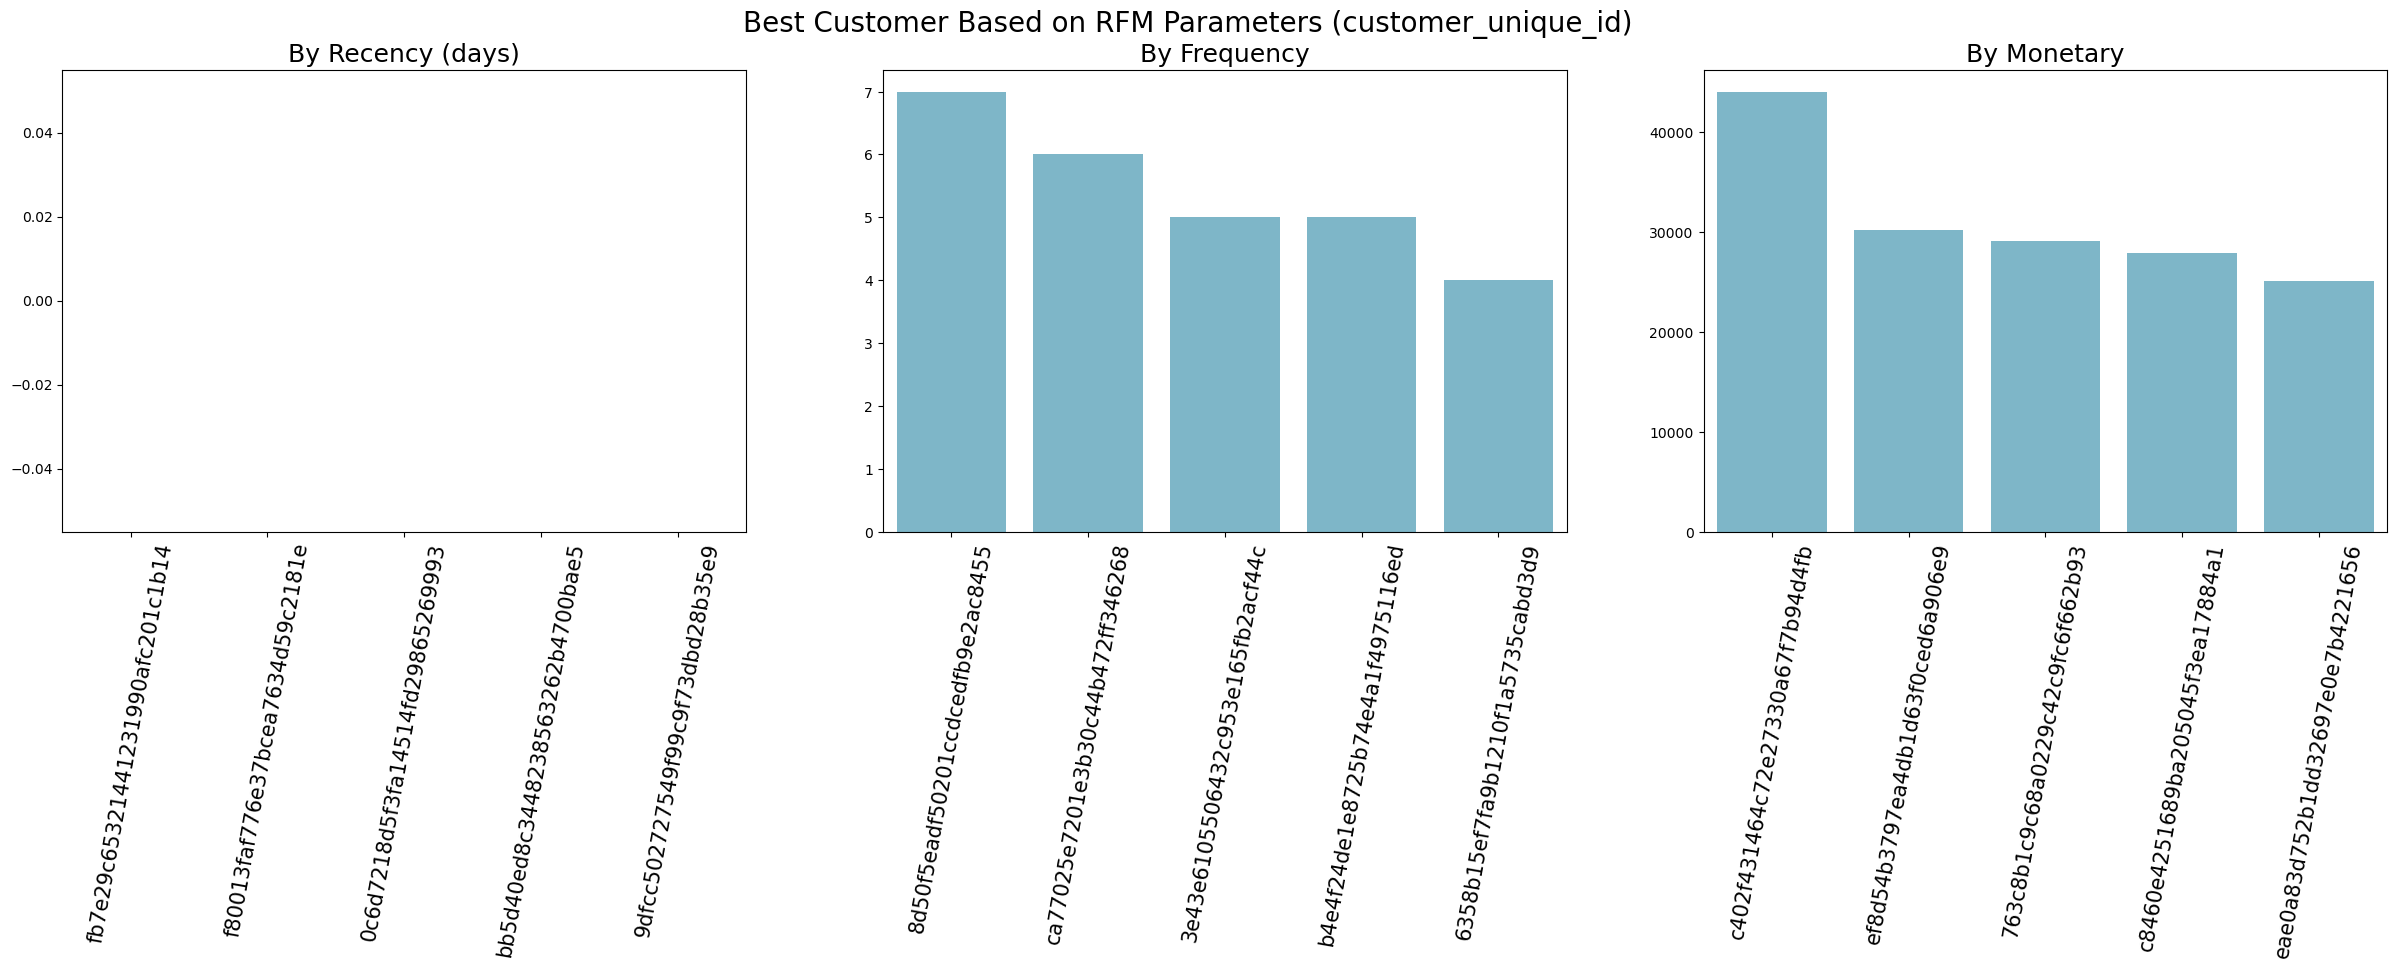

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot Recency
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='x', rotation=80)  # Rotate x-axis labels by 45 degrees

# Plot Frequency
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='x', rotation=80)  # Rotate x-axis labels by 45 degrees

# Plot Monetary
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis='x', rotation=80)  # Rotate x-axis labels by 45 degrees

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()


### Product Selling

C:\Users\Administrator\AppData\Local\Temp\ipykernel_496\1693847702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_df['order_item_id'] = delivered_df['order_item_id'].astype(int)


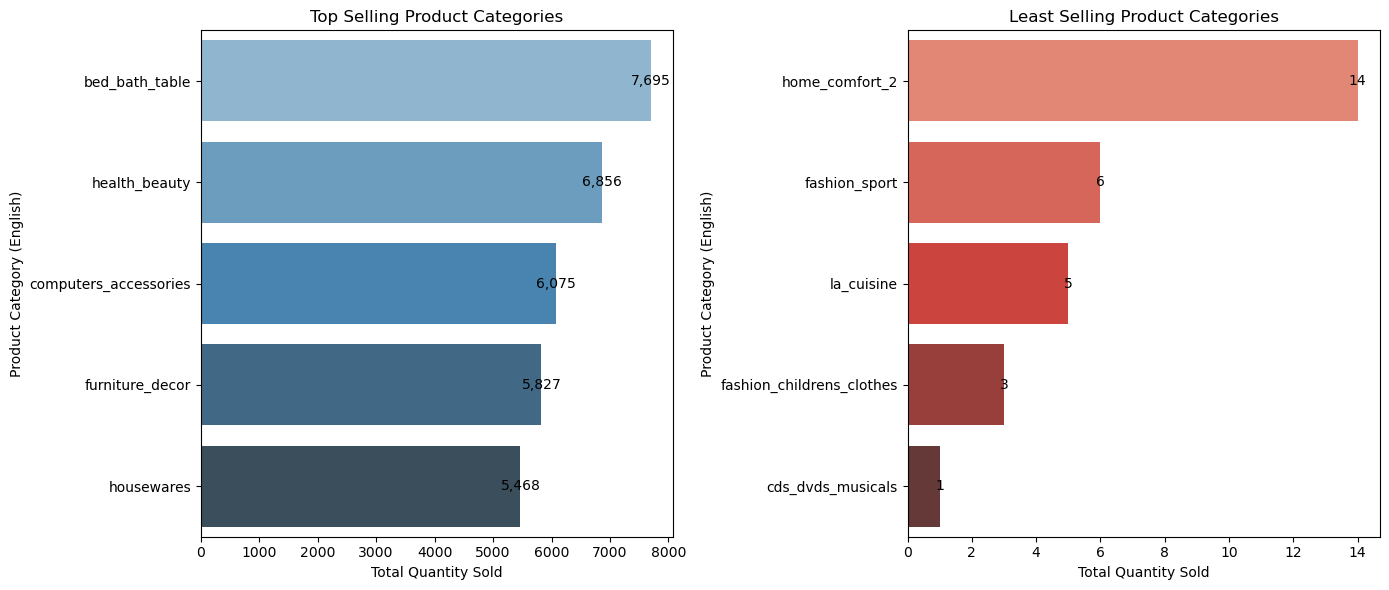

In [134]:
# Convert 'order_item_id' to numeric (integer) type
delivered_df['order_item_id'] = delivered_df['order_item_id'].astype(int)

# Group by product category and calculate the sum of quantities sold
category_sales = delivered_df.groupby('product_category_name_english')['order_item_id'].sum().reset_index()

# Sort the categories by total quantity sold (from highest to lowest)
category_sales_sorted = category_sales.sort_values(by='order_item_id', ascending=False)

# Get the top and least selling categories (e.g., top 5 and least 5)
top_selling_categories = category_sales_sorted.head(5)
least_selling_categories = category_sales_sorted.tail(5)

# Create subplots for top and least selling categories
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top selling categories
sns.barplot(x='order_item_id', y='product_category_name_english', data=top_selling_categories, ax=axes[0], palette='Blues_d')
axes[0].set_xlabel('Total Quantity Sold')
axes[0].set_ylabel('Product Category (English)')
axes[0].set_title('Top Selling Product Categories')
axes[0].tick_params(axis='y', labelrotation=0)

# Add bar value labels for the top selling categories
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center')

# Plot the least selling categories
sns.barplot(x='order_item_id', y='product_category_name_english', data=least_selling_categories, ax=axes[1], palette='Reds_d')
axes[1].set_xlabel('Total Quantity Sold')
axes[1].set_ylabel('Product Category (English)')
axes[1].set_title('Least Selling Product Categories')
axes[1].tick_params(axis='y', labelrotation=0)

# Add bar value labels for the least selling categories
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


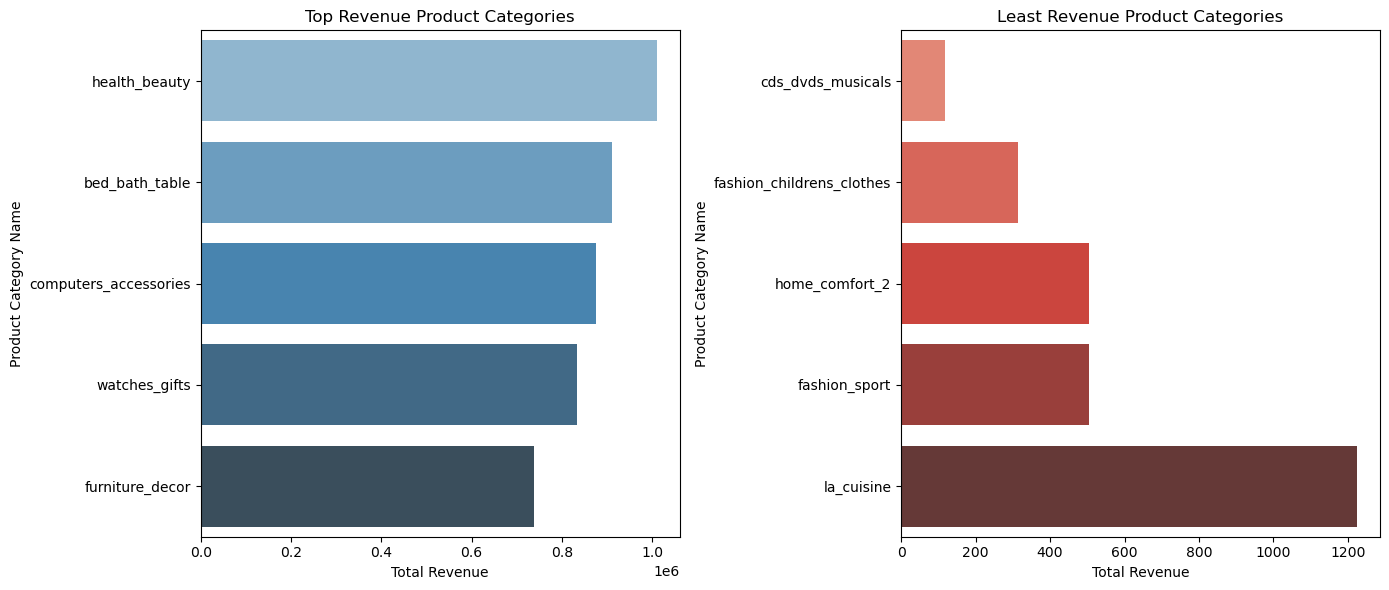

In [135]:
# Group the delivered_df by product category and calculate the total revenue for each category
product_revenue = delivered_df.groupby('product_category_name_english')['payment_value'].sum().reset_index()

# Sort the DataFrame by revenue in descending order to find the top-selling product category
top_revenue_categories = product_revenue.sort_values(by='payment_value', ascending=False).head(5)

# Sort the DataFrame by revenue in ascending order to find the least-selling product category
least_revenue_categories = product_revenue.sort_values(by='payment_value').head(5)

# Create subplots for top and least revenue categories
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top revenue categories
sns.barplot(x='payment_value', y='product_category_name_english', data=top_revenue_categories, ax=axes[0], palette='Blues_d')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Product Category Name')
axes[0].set_title('Top Revenue Product Categories')
axes[0].tick_params(axis='y', labelrotation=0)

# Plot the least revenue categories
sns.barplot(x='payment_value', y='product_category_name_english', data=least_revenue_categories, ax=axes[1], palette='Reds_d')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Product Category Name')
axes[1].set_title('Least Revenue Product Categories')
axes[1].tick_params(axis='y', labelrotation=0)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Pertanyaan 3

### Sellers Performance

In [136]:
# Calculate average review score for each seller
average_review_scores = delivered_df.groupby('seller_id')['review_score'].mean().reset_index()

# Calculate total quantity sold for each seller
total_qty_sold = delivered_df.groupby('seller_id')['order_item_id'].sum().reset_index()
total_qty_sold.rename(columns={'order_item_id': 'qty'}, inplace=True)  # Rename the column

# Merge the two DataFrames
seller_performance = pd.merge(average_review_scores, total_qty_sold, on='seller_id')

# Rank sellers based on review score and quantity sold separately
seller_performance['review_score_rank'] = seller_performance['review_score'].rank(ascending=False)
seller_performance['qty_rank'] = seller_performance['qty'].rank(ascending=False)

# Calculate a combined rank as the sum of the two ranks
seller_performance['combined_rank'] = seller_performance['review_score_rank'] + seller_performance['qty_rank']

# Sort the DataFrame based on the combined rank
seller_performance_sorted = seller_performance.sort_values(by='combined_rank')

# Identify the best and worst performing sellers
best_sellers = seller_performance_sorted.nsmallest(5, 'combined_rank')
worst_sellers = seller_performance_sorted.nlargest(5, 'combined_rank')

# Print or analyze the best and worst performing sellers
print("Best Performing Sellers:")
print(best_sellers)

print("\nWorst Performing Sellers:")
print(worst_sellers)


Best Performing Sellers:
                             seller_id  review_score  qty  review_score_rank  \
1787  c394e193cda3b4225ff2094d32184849      5.000000   56              230.0   
475   334cab711dee080b079fa5779b584783      4.933333   73              460.5   
1993  d9bd94811c3338dceb4181f3dbc0c73e      4.822581   72              512.0   
1915  d13e50eaa47b4cbe9eb81465865d8cfc      4.814286   72              514.0   
1844  c8c1bea22194a4eefa2dc9a9fa89f536      5.000000   29              230.0   

      qty_rank  combined_rank  
1787     292.0          522.0  
475      220.5          681.0  
1993     227.0          739.0  
1915     227.0          741.0  
1844     518.0          748.0  

Worst Performing Sellers:
                             seller_id  review_score  qty  review_score_rank  \
1529  a4b8d97cd5d3674eeff96abc99d8ed67           1.0    1             2303.0   
1757  c004e5ea15737026cecaee0447e00b75           1.0    1             2303.0   
199   154bdf805377afea75a3bd158e9ea

#### Seller Performance Rank

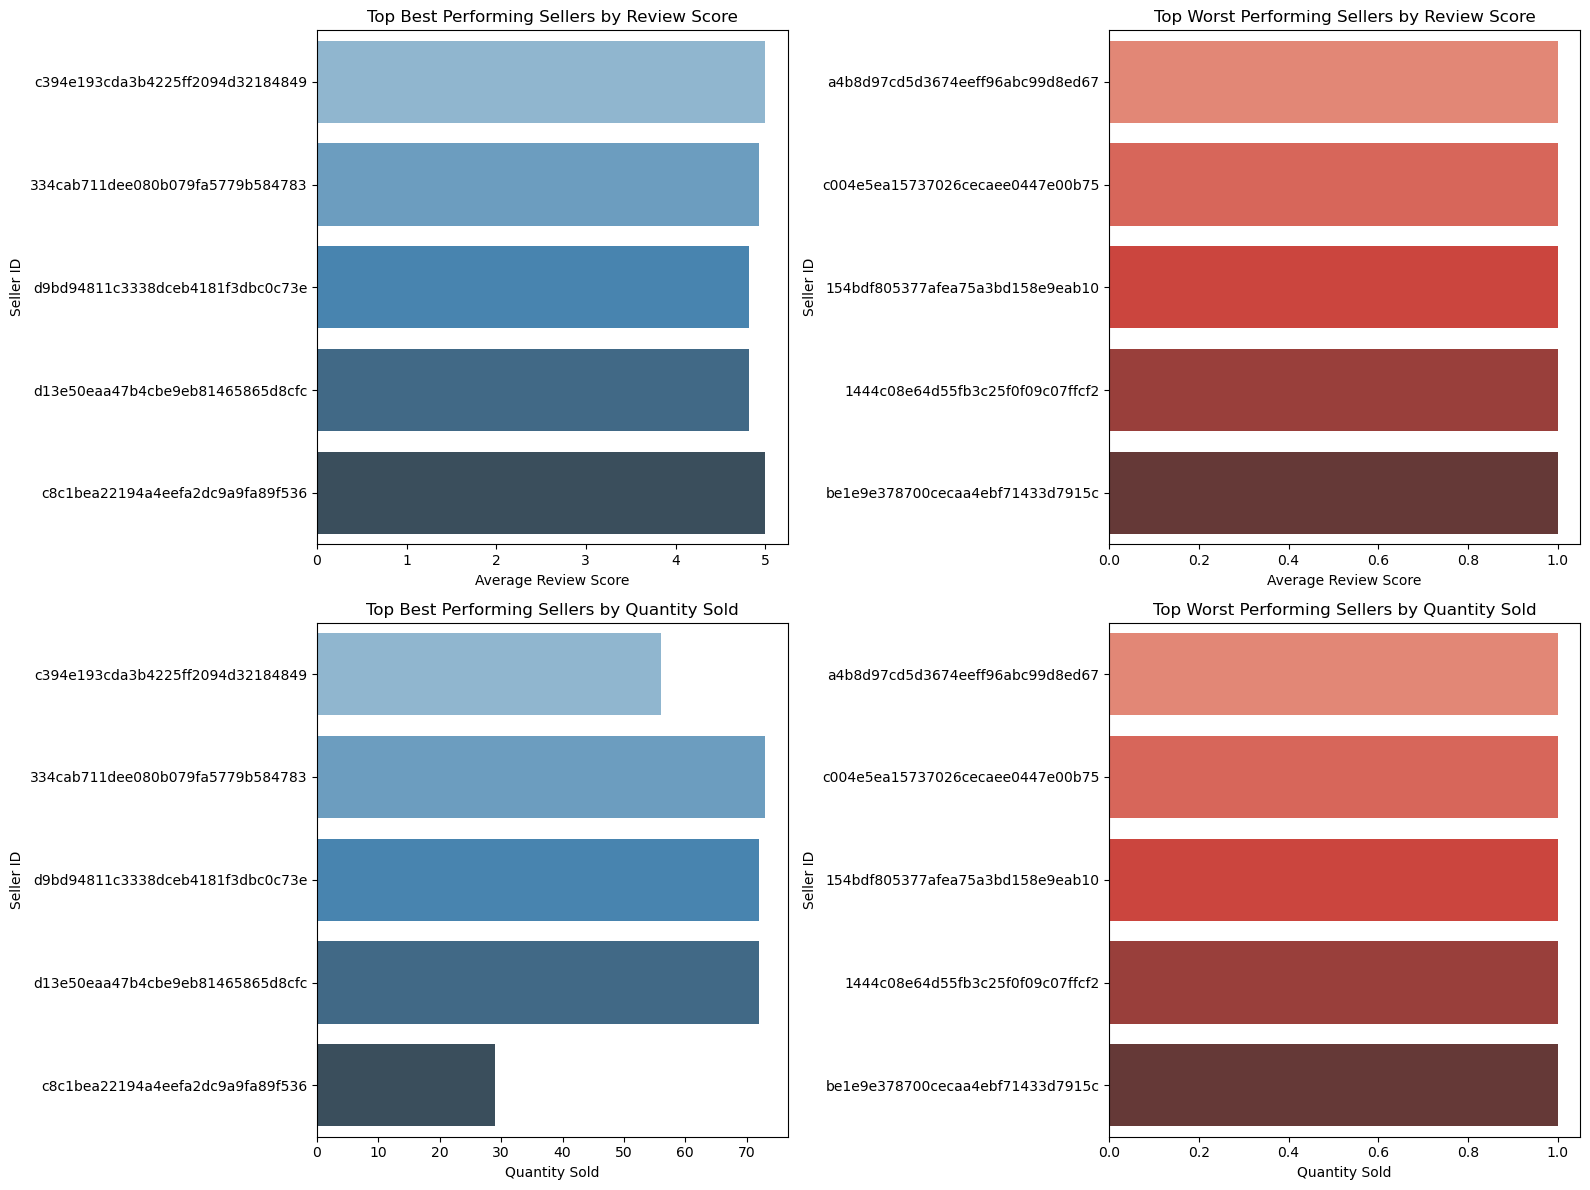

In [137]:
# Get the top 5 best and worst performing sellers
best_sellers = seller_performance_sorted.nsmallest(5, 'combined_rank')
worst_sellers = seller_performance_sorted.nlargest(5, 'combined_rank')

# Create subplots for best and worst performing sellers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the top best performing sellers by review score
sns.barplot(x='review_score', y='seller_id', data=best_sellers, ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_xlabel('Average Review Score')
axes[0, 0].set_ylabel('Seller ID')
axes[0, 0].set_title('Top Best Performing Sellers by Review Score')
axes[0, 0].tick_params(axis='y', labelrotation=0)

# Plot the top worst performing sellers by review score
sns.barplot(x='review_score', y='seller_id', data=worst_sellers, ax=axes[0, 1], palette='Reds_d')
axes[0, 1].set_xlabel('Average Review Score')
axes[0, 1].set_ylabel('Seller ID')
axes[0, 1].set_title('Top Worst Performing Sellers by Review Score')
axes[0, 1].tick_params(axis='y', labelrotation=0)

# Plot the top best performing sellers by quantity sold
sns.barplot(x='qty', y='seller_id', data=best_sellers, ax=axes[1, 0], palette='Blues_d')
axes[1, 0].set_xlabel('Quantity Sold')
axes[1, 0].set_ylabel('Seller ID')
axes[1, 0].set_title('Top Best Performing Sellers by Quantity Sold')
axes[1, 0].tick_params(axis='y', labelrotation=0)

# Plot the top worst performing sellers by quantity sold
sns.barplot(x='qty', y='seller_id', data=worst_sellers, ax=axes[1, 1], palette='Reds_d')
axes[1, 1].set_xlabel('Quantity Sold')
axes[1, 1].set_ylabel('Seller ID')
axes[1, 1].set_title('Top Worst Performing Sellers by Quantity Sold')
axes[1, 1].tick_params(axis='y', labelrotation=0)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


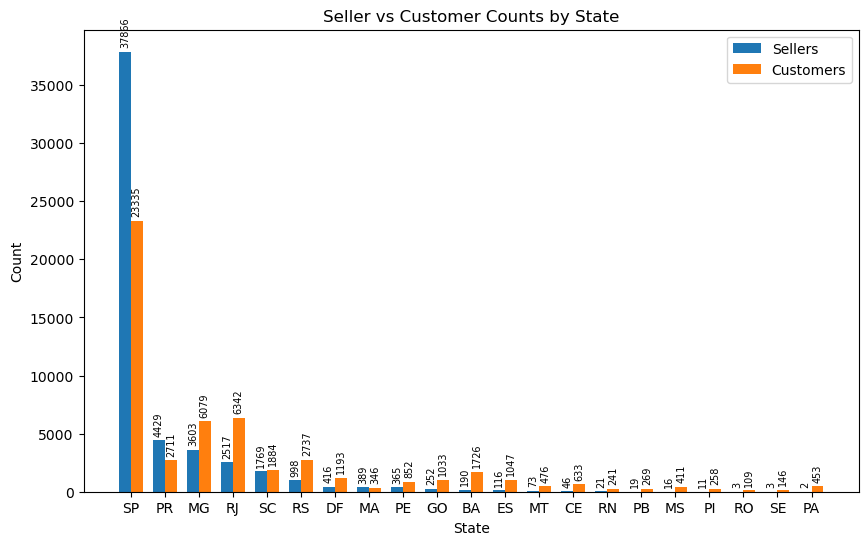

In [138]:
#Sellers vs customer's location

# Combine seller and customer data into one DataFrame
combined_data = pd.merge(seller_state_order_counts, customer_state_order_counts, left_on='seller_state', right_on='customer_state', suffixes=('_seller', '_customer'))

# Create a bar chart
plt.figure(figsize=(10, 6))

states = combined_data['seller_state']
seller_counts = combined_data['unique_order_count_seller']
customer_counts = combined_data['unique_order_count_customer']

bar_width = 0.35
index = range(len(states))

bar1 = plt.bar(index, seller_counts, bar_width, label='Sellers')
bar2 = plt.bar([i + bar_width for i in index], customer_counts, bar_width, label='Customers')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Seller vs Customer Counts by State')
plt.xticks([i + bar_width / 2 for i in index], states, rotation=0)
plt.legend()

# Add label values to the bars diagonally
def add_label_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90, fontsize=7, fontweight='normal')  # Rotate and style labels

add_label_values(bar1)
add_label_values(bar2)

plt.show()

In [139]:
# Display the combined data
combined_data

,seller_state,unique_order_count_seller,customer_state,unique_order_count_customer
0,SP,37866,SP,23335
1,PR,4429,PR,2711
2,MG,3603,MG,6079
3,RJ,2517,RJ,6342
4,SC,1769,SC,1884
5,RS,998,RS,2737
6,DF,416,DF,1193
7,MA,389,MA,346
8,PE,365,PE,852
9,GO,252,GO,1033


# Conclusion

Conclusion Pertanyaan 1. Bagaimana performa penjualan sepanjang 2018 ini?

Jumlah penjualan berdasarkan total revenue pada bulan Agustus menurun dibandingkan penjualan bulan Januari, yakni 1,24 juta dibandingkan bulan Januari di 1,42 juta. sedangkan bulan September dan Oktober belum ada data delivered order.
Sebelumnya, revenue sudah menurun sejak bulan Februari di 1,32 juta, namun naik di bulan Maret dan terus stabil di kisaran 1,5 juta hingga bulan Mei, namun turun kembali hingga bulan Agustus ini. 

Jumlah delivered order pun turun dengan drastis dari 7062 order di Januari menjadi 6351 pada bulan Agustus, dengan jumlah order terendah pada bulan Juni sebanyak 6099.

Dari data cancelled order, pada bulan Februari dan Agustus terjadi kenaikan cancelled order, yakni masing-masing 70 dan 84 order. Data cancelled order juga sudah ada untuk bulan September dan Oktober sebanyak 15 dan 4 order. 

Conclusion Pertanyaan 2. Bagaimana trend customer dan product pada pesanan yang sukses?

Customer terbanyak berasal dari Sao Paulo, SP. 
Pembayaran terpopuler adalah dengan menggunakan credit card, dengan installment dan sequntial 1, yakni hampir 30,000 order.

Dari chart RFM diketahui bahwa tidak ada pembelian yang dilakukan dalam jangka waktu terakhir. Sedangkan frequent customer adalah customer dengan jumlah order 7. Sedangkan by monetary, customer dengan spend terbanyak menghasilkan revenue hampir 45,000.

Kategori barang yang paling banyak dibeli adalah bed_bath_table sebanyak 7,695, yang diikuti dengan health_beauty dan computer_accessories. 
Meskipun begitu, berdasarkan revenue, produk yang paling menghasilkan revenue tertinggi adalah health beauty, kemudian baru menyusul bed bath table dan computer accessories. 

Sedangkan barang yang paling tidak populer adalah cds dvds musicals, fashion children clothes, dan la cuisine.
Namun dari segi revenue, la cuisine yang menjadi least selling product ketiga memberikan revenue 

3. Bagaimana performa top and least performing sellers tahun 2018?

The top 5 performing sellers menyelesaikan orders sebanyak 56 hingga 73 sales, dengan rating 4.8 sampai 5.
Least performing sellers hanya memiliki 1 order dengan review 1.
Berdasarkan banyaknya order yang diterima, seller di SP menjadi seller favorit dengan penjualan terbanyak. 